# *MIni Batch*

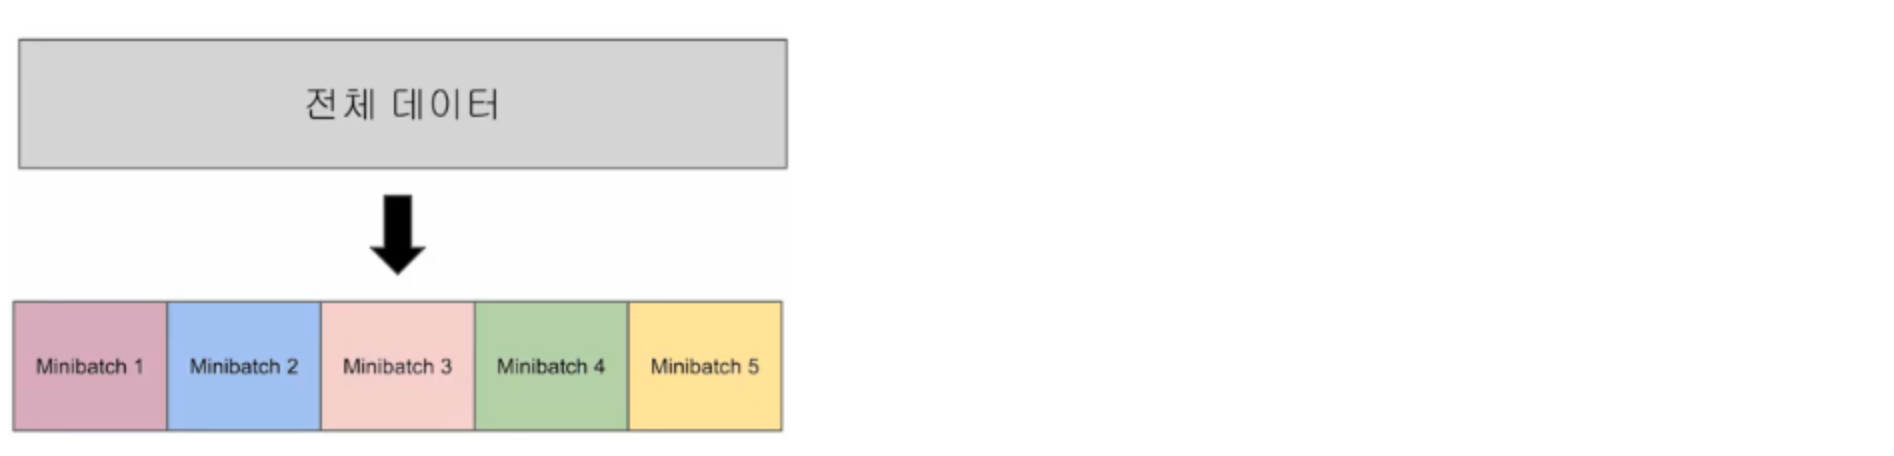
전체 데이터를 미니 배치 단위로 나눔

1. 위 방식으로 학습하여 미니 배치 만큼만 가져가 <b>해당 만큼의 비용(cost)를 계산하고, 경사 하강법을 수행</b><br>
2. 그 다음 미니 배치를 가져가 비용 계산, 경사하강법을 수행하고 <b>마지막 미니 배치까지 반복</b><br>
3. 이렇게 <b>전체 데이터에 대한 학습이 끝나면 1epoch가 끝</b>

<big><b>배치 경사 하강법</b></big> : 전체 데이터에 대해 한 번에 경사 하강법을 수행<br>
<blockquote>가중치 값이 최적값에 수렴하는 과정이 매우 안정적이나, 계산량이 너무 많이 듦<br></blockquote>
<big><b>미니 배치 경사 하강법</b></big> : 미니 배치 단위로 경사 하강법을 수행
<blockquote>전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값을 헤매지만 훈련 속도가 빠름<br></blockquote>

### 배치 크기는 2 제곱수 사용
### cpu, gpu 메모리가 2의 배수이므로 배치 크기가 2 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있음

# 

# *Iteration*

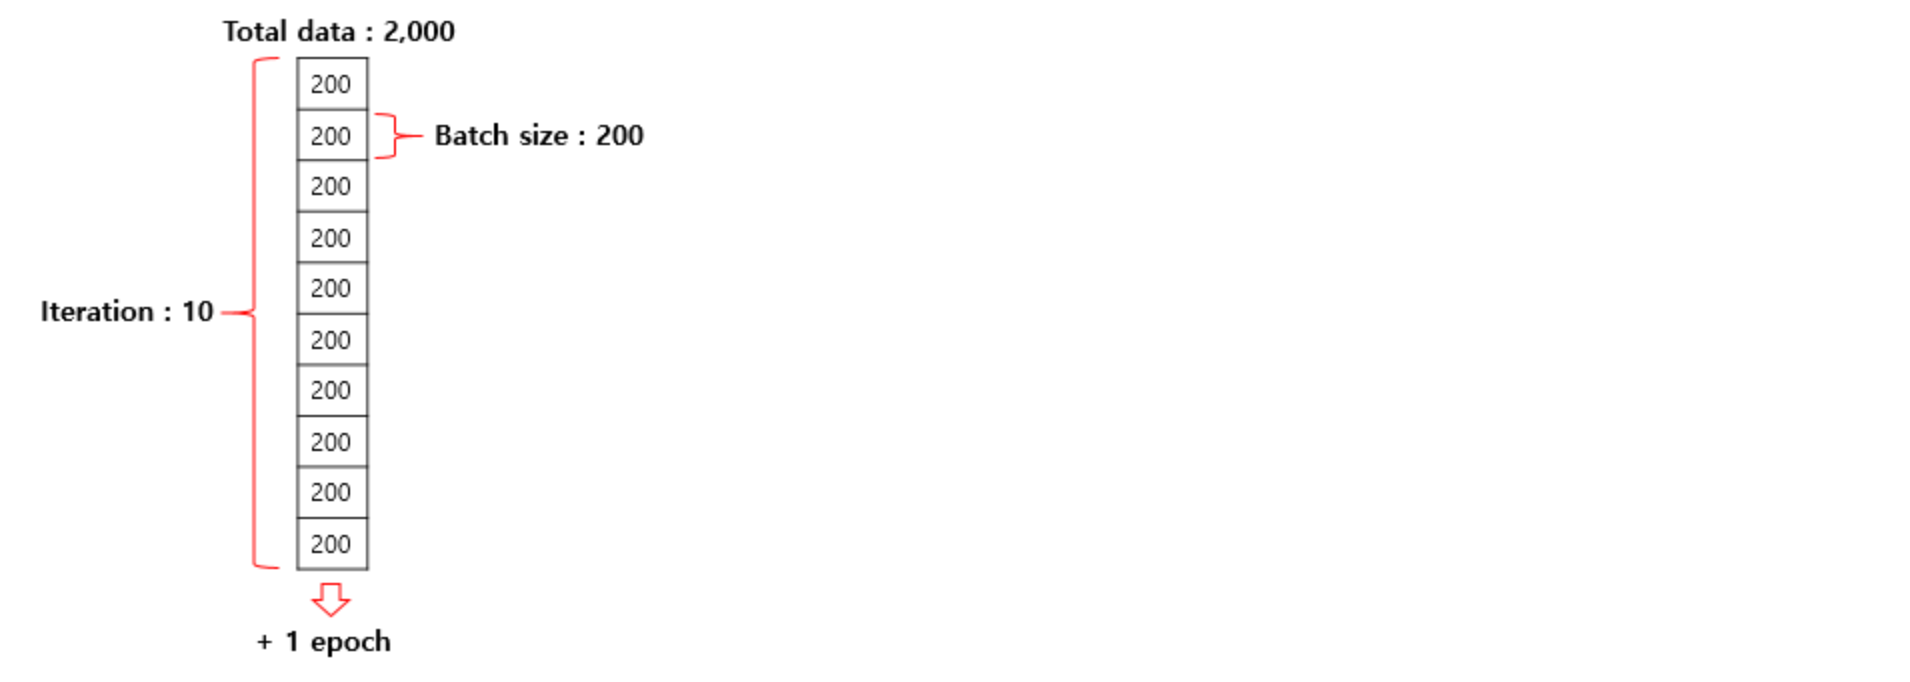

<b>이터레이션</b>은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 편향 b의 업데이트 횟수<br>
전체 데이터가 2,000일 때, 배치 크기를 200으로 하면 이터레이션 수는 총 10<br>

# 

# *Pytorch DataLoad*

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [3]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

### *dataset*

In [4]:
dataset = TensorDataset(x_train, y_train)

In [7]:
print(list(dataset))

[(tensor([73., 80., 75.]), tensor([152.])), (tensor([93., 88., 93.]), tensor([185.])), (tensor([89., 91., 90.]), tensor([180.])), (tensor([ 96.,  98., 100.]), tensor([196.])), (tensor([73., 66., 70.]), tensor([142.]))]


### *dataloader*

In [8]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [10]:
print(list(dataloader))

[[tensor([[93., 88., 93.],
        [89., 91., 90.]]), tensor([[185.],
        [180.]])], [tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])], [tensor([[73., 66., 70.]]), tensor([[142.]])]]


pytorch의 dataset을 만들면 dataloader 사용 가능<br>
<b>shuffle</b> : 모델이 데이터셋의 순서에 익숙해지는 것을 방지하기 위해 사용

### model

In [11]:
model = nn.Linear(3, 1)

### optimizer

In [14]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

### train

In [22]:
nb_epochs = 20
for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        # H(x) 계산
        pred = model(x_train)
        
        # cost 계산
        cost = F.mse_loss(pred, y_train)
        
        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print(f'Epoch: {epoch}/{nb_epochs} Batch: {batch_idx+1}/{len(dataloader)} → cost: {cost.item()}')

Epoch: 0/20 Batch: 1/3 → cost: 3.556349277496338
Epoch: 0/20 Batch: 2/3 → cost: 1.3338935375213623
Epoch: 0/20 Batch: 3/3 → cost: 0.0008529508486390114
Epoch: 1/20 Batch: 1/3 → cost: 0.09286510199308395
Epoch: 1/20 Batch: 2/3 → cost: 2.1576950550079346
Epoch: 1/20 Batch: 3/3 → cost: 1.7074294090270996
Epoch: 2/20 Batch: 1/3 → cost: 1.9592835903167725
Epoch: 2/20 Batch: 2/3 → cost: 0.8910548090934753
Epoch: 2/20 Batch: 3/3 → cost: 0.25555419921875
Epoch: 3/20 Batch: 1/3 → cost: 1.0939562320709229
Epoch: 3/20 Batch: 2/3 → cost: 1.410858392715454
Epoch: 3/20 Batch: 3/3 → cost: 1.0763872861862183
Epoch: 4/20 Batch: 1/3 → cost: 1.0406227111816406
Epoch: 4/20 Batch: 2/3 → cost: 0.487562358379364
Epoch: 4/20 Batch: 3/3 → cost: 3.729349374771118
Epoch: 5/20 Batch: 1/3 → cost: 1.6524937152862549
Epoch: 5/20 Batch: 2/3 → cost: 2.6936488151550293
Epoch: 5/20 Batch: 3/3 → cost: 0.43246838450431824
Epoch: 6/20 Batch: 1/3 → cost: 1.6192176342010498
Epoch: 6/20 Batch: 2/3 → cost: 0.5012722611427307
E

### *predict*

In [24]:
new_var =  torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print(f"pred : {pred_y}")

pred : tensor([[152.4426]], grad_fn=<AddmmBackward0>)


# 

# *Custom Dataset*

In [1]:
import torch
import torch.nn.functional as F

In [2]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [3]:
# Custom Dataset의 기본 뼈대
class CustomDataset(Dataset):
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self, x_train, y_train):
        self.x_data = x_train
        self.y_data = y_train
        print(self.x_data)
        print(self.y_data)
        
    # 데이터셋의 길이. 즉, 샘플의 수를 적는 부분
    def __len__(self):
        return len(self.x_data)
    
    # index를 입력받아 그에 맵핑되는 입출력 데이터를 Pytorch Tensor 형태로 return
    def __getitem__(self, idx):
        x = torch.Tensor(self.x_data[idx])
        y = torch.Tensor(self.y_data[idx])
        return x, y

In [4]:
x_train = [[73, 80, 75],
           [93, 88, 93],
           [89, 91, 90],
           [96, 98, 100],
           [73, 66, 70]]
y_train = [[152], [185], [180], [196], [142]]

In [5]:
dataset = CustomDataset(x_train, y_train)

[[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]]
[[152], [185], [180], [196], [142]]


In [6]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [7]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [8]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{}     Batch {}/{}     Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20     Batch 1/3     Cost: 37715.250000
Epoch    0/20     Batch 2/3     Cost: 9055.566406
Epoch    0/20     Batch 3/3     Cost: 1749.064209
Epoch    1/20     Batch 1/3     Cost: 1187.269897
Epoch    1/20     Batch 2/3     Cost: 419.446930
Epoch    1/20     Batch 3/3     Cost: 140.870346
Epoch    2/20     Batch 1/3     Cost: 42.091644
Epoch    2/20     Batch 2/3     Cost: 6.947245
Epoch    2/20     Batch 3/3     Cost: 6.191088
Epoch    3/20     Batch 1/3     Cost: 2.026039
Epoch    3/20     Batch 2/3     Cost: 0.652008
Epoch    3/20     Batch 3/3     Cost: 5.299845
Epoch    4/20     Batch 1/3     Cost: 2.083082
Epoch    4/20     Batch 2/3     Cost: 0.007228
Epoch    4/20     Batch 3/3     Cost: 3.298389
Epoch    5/20     Batch 1/3     Cost: 1.064456
Epoch    5/20     Batch 2/3     Cost: 2.981088
Epoch    5/20     Batch 3/3     Cost: 1.144099
Epoch    6/20     Batch 1/3     Cost: 2.928708
Epoch    6/20     Batch 2/3     Cost: 0.048779
Epoch    6/20     Batch 3/3     Cost: 0.98

### *Predict*

In [9]:
new_var = torch.Tensor([[73, 80, 75]])
pred_y = model(new_var)

In [10]:
print(pred_y)

tensor([[150.6831]], grad_fn=<AddmmBackward0>)
